<a href="https://colab.research.google.com/github/ShawneilRodrigues/cats_Dogs_classification/blob/main/cats_Dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/salader/dogs-vs-cats/data'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shawneilrodrigues
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:08<00:00, 138MB/s]


In [2]:
import os
data_dir = './dogs-vs-cats'
os.listdir(data_dir)

['dogs_vs_cats', 'test', 'train']

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization


In [4]:
train_df=keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_df=keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_df=train_df.map(process)
validation_df=validation_df.map(process)

In [15]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(train_df,epochs=10,validation_data=validation_df)

Epoch 1/10
625/625 [==============================] - 70s 108ms/step - loss: 1.2436 - accuracy: 0.5806 - val_loss: 0.6179 - val_accuracy: 0.6670
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5917 - accuracy: 0.6905 - val_loss: 0.5400 - val_accuracy: 0.7250
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4980 - accuracy: 0.7585 - val_loss: 0.4630 - val_accuracy: 0.7796
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4334 - accuracy: 0.8007 - val_loss: 0.4984 - val_accuracy: 0.7830
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3653 - accuracy: 0.8375 - val_loss: 0.5449 - val_accuracy: 0.7536
Epoch 6/10
625/625 [==============================] - 64s 103ms/step - loss: 0.2882 - accuracy: 0.8769 - val_loss: 0.4818 - val_accuracy: 0.8110
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2009 - accuracy: 0.9183 - val_loss: 0.5681 - val_ac

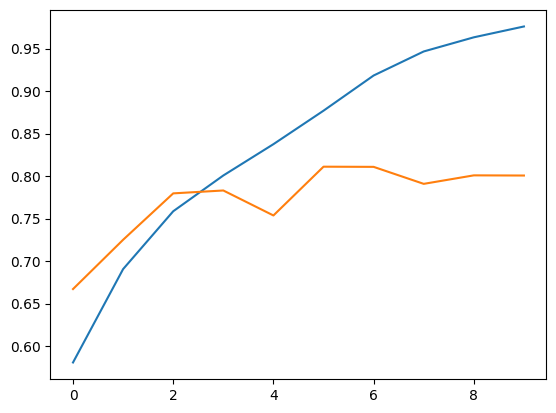

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


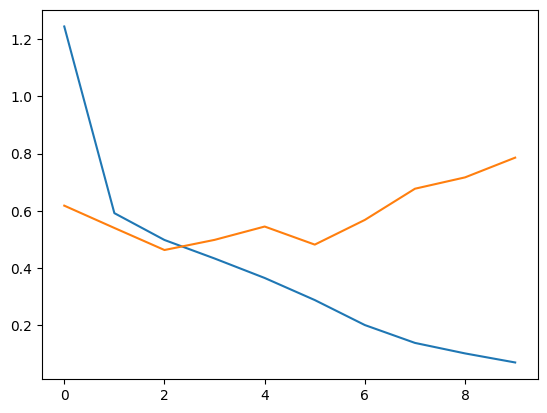

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [29]:
import cv2
test_img=cv2.imread('/content/RSNQ1816.JPG')


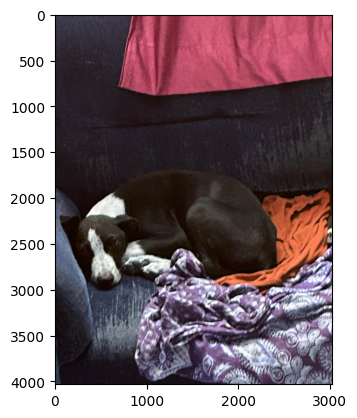

In [30]:
plt.imshow(test_img)

In [31]:
test_img.shape

(4032, 3024, 3)

In [32]:
test_img=cv2.resize(test_img,(256,256))

In [33]:
test_input=test_img.reshape((1,256,256,3))

In [34]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)